## MiMA resolved GW spectra

Can use Helmholtz decomposition to estimate resolved GW flux at T42 resolution directly from windflux. Will try with windspharm (easy to install than pyspharm)  
Express vector field in terms of divergent and rotational part. 
$$
u = \nabla \phi + \nabla \times \psi
$$
Note that:
$$
\nabla . u = 0 \implies \nabla^2 \phi = 0
$$
AND 
$$
\zeta = \nabla \times u \implies \zeta = - \nabla^2 \psi
$$ 

In [2]:
import xarray as xr 
from constants import R_DRY
ds = xr.open_dataset('data/atmos_daily_omega.nc')

In [2]:
ds_mask_trop = xr.open_dataset('data/loon_masks.nc')

ds_mask_trop['lon'] = (ds_mask_trop.lon + 360) % 360 
ds_mask_trop = ds_mask_trop.sortby('lon')

interp_mask = ds_mask_trop.interp(lat=ds.lat,lon=ds.lon,method='nearest').astype(bool)

total_mask = sum(interp_mask[d] for d in interp_mask.data_vars)


In [3]:
from windspharm.xarray import VectorWind

wind = VectorWind(ds.ucomp,ds.vcomp)

In [4]:
uchi,_,upsi,_ = wind.helmholtz()
uchiT21,_,upsiT21,_ = wind.helmholtz(truncation=21)

In [5]:
u_pert = uchi - uchiT21

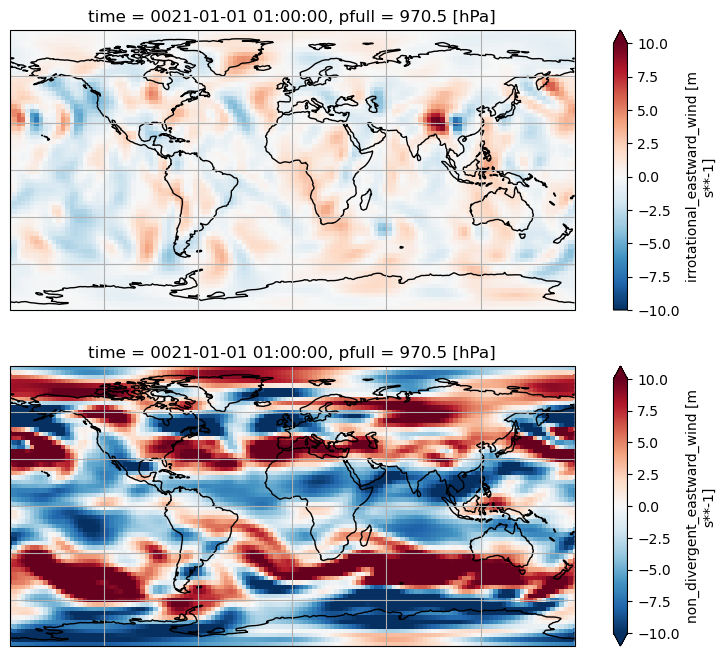

In [6]:
import cartopy.crs as ccrs 
import matplotlib.pyplot as plt
uchi_sfc = uchi.isel(pfull=-1,time=0)
upsi_sfc = upsi.isel(pfull=-1,time=0)

fig,(ax_nd,ax_rot) = plt.subplots(2,1,subplot_kw={'projection': ccrs.PlateCarree()},figsize=(10,8))  
uchi_sfc.plot(ax=ax_nd,transform=ccrs.PlateCarree(),cmap='RdBu_r',vmin=-10,vmax=10) 
ax_nd.coastlines()
ax_nd.gridlines() 
upsi_sfc.plot(ax=ax_rot,transform=ccrs.PlateCarree(),cmap='RdBu_r',vmin=-10,vmax=10)
ax_rot.coastlines()
ax_rot.gridlines()


In [7]:
psi = wind.streamfunction()
vort = wind.vorticity()

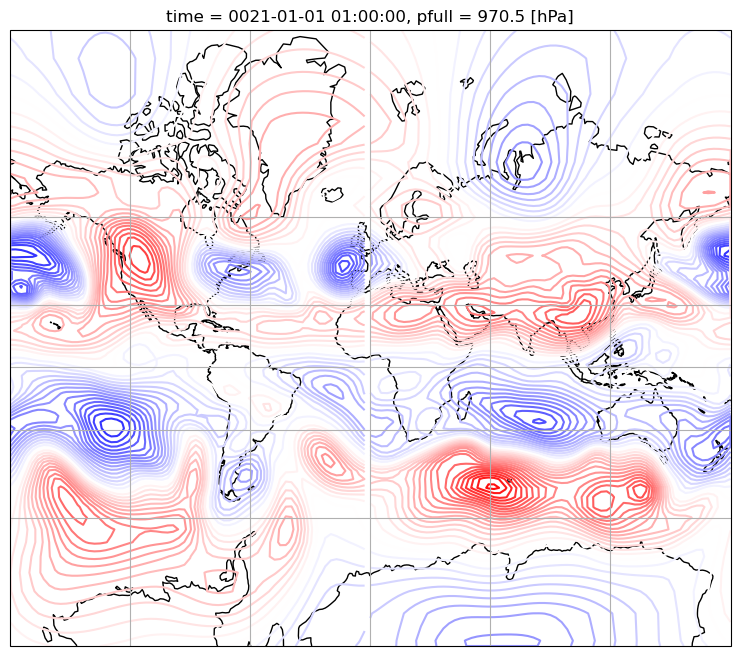

In [8]:
psi_sfc = psi.isel(pfull=-1,time=0)
fig,ax = plt.subplots(1,1,subplot_kw={'projection': ccrs.Mercator()},figsize=(10,8))
psi_sfc.plot.contour(ax=ax,transform=ccrs.PlateCarree(),cmap='bwr',levels=50)
ax.coastlines()
ax.gridlines()

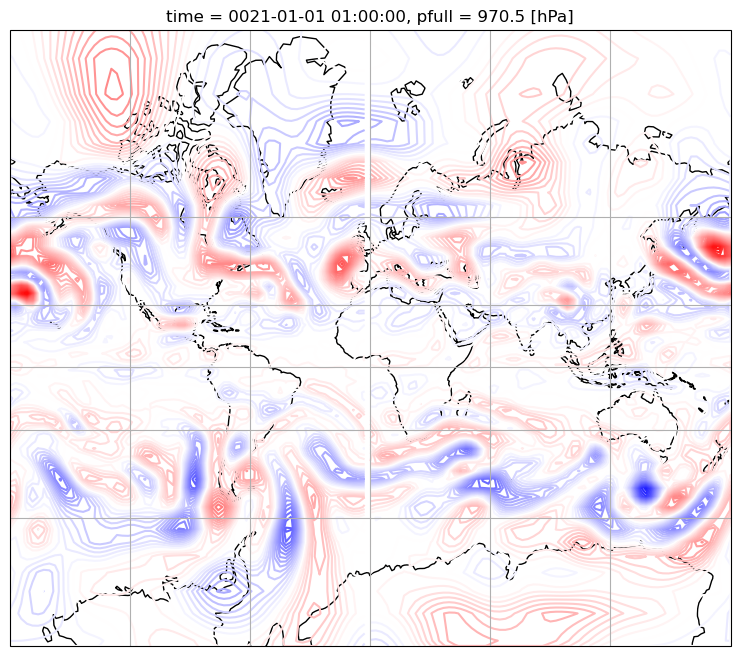

In [9]:
vort_sfc = vort.isel(pfull=-1,time=0)
fig,ax = plt.subplots(1,1,subplot_kw={'projection': ccrs.Mercator()},figsize=(10,8))
vort_sfc.plot.contour(ax=ax,transform=ccrs.PlateCarree(),cmap='bwr',levels=50)
ax.coastlines()
ax.gridlines()

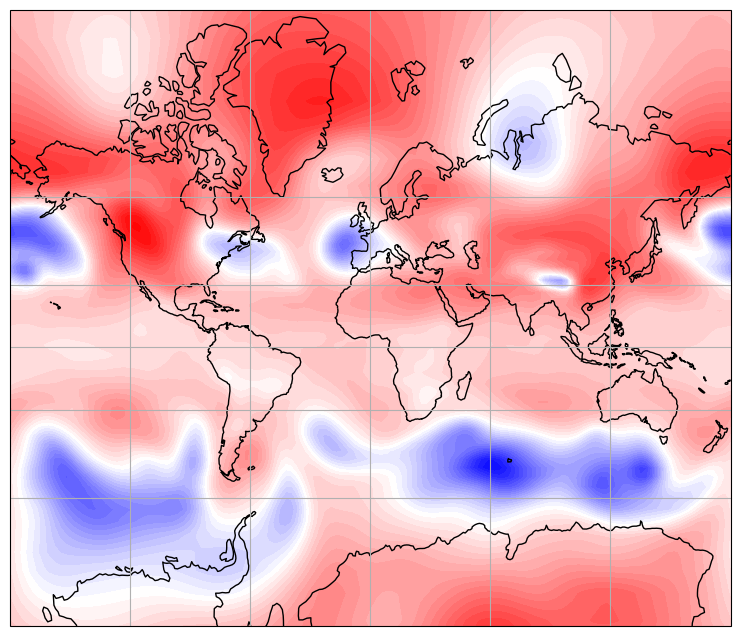

In [10]:
from cartopy.util import add_cyclic_point
from constants import C_P, GAMMA,GRAV
import numpy as np
fig,ax = plt.subplots(1,1,subplot_kw={'projection': ccrs.Mercator()},figsize=(10,8))
slp = ds.ps*(1 + (GRAV/C_P)*ds.height.isel(pfull=-1)/ds.temp.isel(pfull=-1))**(GAMMA/(GAMMA-1))


from matplotlib.animation import FuncAnimation

slp_cyclic, new_lon = add_cyclic_point(slp.isel(time=0), coord=ds.lon)
lon,lat = np.meshgrid(new_lon,ds.lat)
contour = ax.contourf(lon,lat, slp_cyclic/100, transform=ccrs.PlateCarree(),cmap='bwr',levels=50)

# def step(i):
#     ax.clear()

#     slp_cyclic, new_lon = add_cyclic_point(slp.isel(time=i), coord=ds.lon)
#     lon,lat = np.meshgrid(new_lon,ds.lat)
#     ax.contourf(lon,lat, slp_cyclic/100, transform=ccrs.PlateCarree(),cmap='bwr',levels=50)
#     ax.coastlines()
#     ax.gridlines()
#     return


ax.coastlines()
ax.gridlines()

# anim = FuncAnimation(fig,step,frames=ds.time.size,interval=100)
# anim.save('slp.mp4', fps=25)


In [11]:
u_pert

<xarray.DataArray 'u_chi' (time: 360, pfull: 40, lat: 64, lon: 128)> Size: 472MB
array([[[[ 2.80928016e-01,  2.22563028e-01,  1.63519025e-01, ...,
           4.50118303e-01,  3.94870639e-01,  3.38422298e-01],
         [ 1.58964753e-01,  1.24956012e-01,  8.60240459e-02, ...,
           2.34082222e-01,  2.13045359e-01,  1.88203096e-01],
         [ 2.41647720e-01,  2.16434240e-01,  1.78655863e-01, ...,
           2.28094101e-01,  2.48086810e-01,  2.52544165e-01],
         ...,
         [-1.35027456e+00, -1.35934019e+00, -1.30622101e+00, ...,
          -1.09560251e+00, -1.20288420e+00, -1.29296708e+00],
         [-6.35171890e-01, -5.15943766e-01, -3.82679462e-01, ...,
          -9.06379461e-01, -8.29956055e-01, -7.39789963e-01],
         [-4.99291897e-01, -4.46026325e-01, -3.91117096e-01, ...,
          -6.42220497e-01, -5.98053217e-01, -5.50196648e-01]],

        [[-4.60763454e-01, -3.96604300e-01, -3.28729868e-01, ...,
          -6.50567770e-01, -5.85848808e-01, -5.23195267e-01],
         [ 9.20653343e-02, -2.10700989e-01, -5.16200542e-01, ...,
           8.86714458e-01,  6.49709702e-01,  3.81992102e-01],
         [ 7.58897305e-01,  3.66419315e-01, -6.37111664e-02, ...,
           1.70052052e+00,  1.42362309e+00,  1.11093521e+00],
...
          -3.55635375e-01, -3.74543458e-01, -3.87455046e-01],
         [-3.29674602e-01, -2.54642785e-01, -1.76669806e-01, ...,
          -5.31964779e-01, -4.68795985e-01, -4.01219428e-01],
         [-3.45944166e-02,  1.99528933e-02,  7.59147406e-02, ...,
          -1.84113562e-01, -1.37166440e-01, -8.71518850e-02]],

        [[-2.26375222e-01, -1.94676518e-01, -1.61317587e-01, ...,
          -3.07627261e-01, -2.83212900e-01, -2.56013274e-01],
         [-2.99599618e-01, -2.27039993e-01, -1.53806329e-01, ...,
          -4.87454146e-01, -4.32332307e-01, -3.68897438e-01],
         [-2.19564885e-01, -5.63277602e-02,  9.87552404e-02, ...,
          -6.36976480e-01, -5.20977437e-01, -3.78426850e-01],
         ...,
         [-7.66596198e-03,  2.52245069e-02,  5.87485135e-02, ...,
          -6.61054552e-02, -5.62177747e-02, -3.59220505e-02],
         [ 2.00059295e-01,  1.74960494e-01,  1.48331374e-01, ...,
           2.67992646e-01,  2.46402830e-01,  2.23809242e-01],
         [ 5.30673862e-01,  5.26252866e-01,  5.21167397e-01, ...,
           5.38351953e-01,  5.36877990e-01,  5.34268260e-01]]]],
      shape=(360, 40, 64, 128), dtype=float32)
Coordinates:
  * lat      (lat) float32 256B 87.86 85.1 82.31 79.53 ... -82.31 -85.1 -87.86
  * lon      (lon) float32 512B 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
  * time     (time) object 3kB 0021-01-01 01:00:00 ... 0021-12-30 01:00:00
  * pfull    (pfull) float32 160B 0.1782 0.5562 0.7238 ... 821.4 902.2 970.5

In [12]:
dwdp_full = -wind.divergence()

In [13]:
## interpolate to half levels
import numpy as np
from scipy.interpolate import make_interp_spline
dwdp_half = np.zeros((len(ds.time),len(ds.phalf),len(ds.lat),len(ds.lon)))
dwdp_half[:,1:-1] = 0.5*(dwdp_full[:,:-1].data + dwdp_full[:,1:].data)
dwdp_half[:,0] = 1.5*dwdp_full[:,0] - 0.5*dwdp_full[:,1]
dwdp_half[:,-1] = 1.5*dwdp_full[:,-1] - 0.5*dwdp_full[:,-2]


In [155]:
shape = list(ds.ucomp.shape)

In [156]:
shape[1] += 1

In [14]:
from scipy.integrate import cumulative_trapezoid

w_half = cumulative_trapezoid(dwdp_half,ds.phalf*100,initial=0,axis=1)
w_half[:,-1] = 0 
w_full = (w_half[:,1:] + w_half[:,:-1])*0.5

In [ ]:
LON,LAT = np.meshgrid(ds.lon,ds.lat,indexing='xy')
fig, (ax_w,ax_hdiv) = plt.subplots(1,2,subplot_kw={'projection': ccrs.Mercator()},figsize=(10,8))
c = ax_w.pcolormesh(LON,LAT,w_full[0,-1],transform=ccrs.PlateCarree(),cmap='bwr',vmin=-1,vmax=1) 
ax_w.coastlines()
ax_w.gridlines()
plt.colorbar(c)

c = ax_hdiv.pcolormesh(LON,LAT,ds.omega[0,-1],transform=ccrs.PlateCarree(),cmap='bwr',vmin=-1,vmax=1)
ax_hdiv.coastlines()
ax_hdiv.gridlines()
plt.colorbar(c)

NameError: name 'np' is not defined

In [ ]:
w_full[0,:,50,50]

array([-4.60667852e-05, -9.65552103e-05, -9.66964114e-05, -6.67913610e-05,
       -4.77352322e-05, -1.57348083e-04, -3.56317448e-04, -3.58476781e-04,
       -3.48875940e-05,  3.03602937e-04,  2.69609533e-04, -1.64403194e-04,
       -6.94761821e-04, -1.02279078e-03, -1.07158815e-03, -8.21744947e-04,
       -4.61601891e-05,  1.36328061e-03,  3.04784607e-03,  4.90091451e-03,
        6.83313816e-03,  7.44602480e-03,  6.84412469e-03,  8.28169663e-03,
        1.19336870e-02,  1.45873337e-02,  1.54776608e-02,  1.55370897e-02,
        1.42280651e-02,  1.02336320e-02,  6.60143206e-03,  8.78282650e-03,
        1.66594135e-02,  2.67082430e-02,  3.77075173e-02,  4.90268643e-02,
        5.44216811e-02,  4.49170634e-02,  2.39187138e-02,  6.14821358e-03])

In [117]:
dwdp_full[0,:,50,50]

<xarray.DataArray 'divergence' (pfull: 40)> Size: 160B
array([-1.9021112e-06,  8.7850162e-07, -2.2634786e-06,  5.4575748e-06,
       -2.2471951e-07, -6.6938046e-06, -7.0847668e-06,  5.7379275e-06,
        7.2515168e-06,  2.3015716e-06, -3.4074790e-06, -4.3044411e-06,
       -2.3516218e-06, -4.2902786e-07,  3.8542908e-07,  6.8735909e-07,
        2.5816639e-06,  3.6769616e-06,  1.6517323e-06,  2.4884755e-06,
        2.7484475e-06, -9.3481947e-07, -2.8351651e-06,  5.0398921e-06,
        4.8087094e-07,  1.2247920e-06, -5.8599721e-07,  3.7446284e-07,
       -3.9085307e-07, -2.0556640e-06, -4.3375849e-07,  1.5961978e-06,
        1.4494622e-06,  1.5507251e-06,  1.3584217e-06,  1.8158269e-06,
        4.7068386e-07, -2.8799891e-06, -3.6931046e-06, -1.6707506e-06],
      dtype=float32)
Coordinates:
    lat      float32 4B -51.63
    lon      float32 4B 140.6
    time     object 8B 0021-01-02 00:00:00
  * pfull    (pfull) float32 160B 0.1782 0.5562 0.7238 ... 821.4 902.2 970.5
Attributes:
    units:          s**-1
    standard_name:  divergence_of_wind
    long_name:      horizontal_divergence

In [20]:
w_prime = w_full - w_full.mean(axis=-1,keepdims=True)
omega_prime = ds.omega - ds.omega.mean(dim='lon')

In [21]:
F_x = u_pert*w_prime/9.81
F_x_omega = -u_pert*omega_prime/9.81

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 0.000e+0

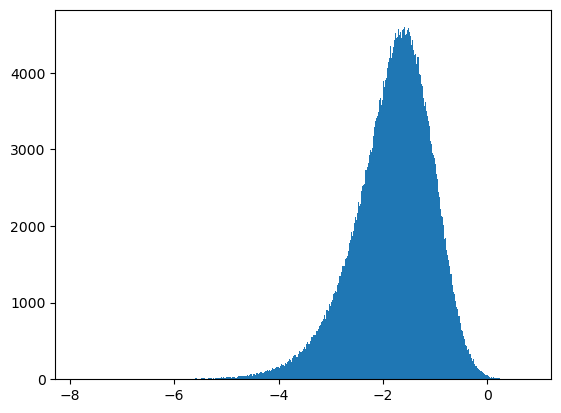

In [23]:
gw_momflux_10hpa = F_x_omega[:,13].where(total_mask).stack(points=('lat','lon')).dropna('points',how='all').data.ravel()
gw_momflux_10hpa = np.abs(gw_momflux_10hpa)
gw_momflux_10hpa = 1000*gw_momflux_10hpa[gw_momflux_10hpa> 0]

plt.hist(np.log10(gw_momflux_10hpa),bins=1000)  